</center><img src="https://www3.um.edu.uy/logoum.jpg" width=300></center>
<h1 align="center">Introducción a la Ciencia de Datos</h1>
<h2 align="center"> <font color='gray'>Trabajo Final</font></h2>

In [97]:
import datetime
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [98]:
data = pd.read_csv('data.csv')
data.head(10)

clean_data = data

In [99]:
pd.set_option('display.max_columns', 50)

## Age

#### Outliers

In [100]:
max = data['age'].max()
min = data['age'].min()
print(f'The max ({max}) and min ({min}) ages are within normal ranges')

The max (98) and min (17) ages are within normal ranges


#### Age distribution

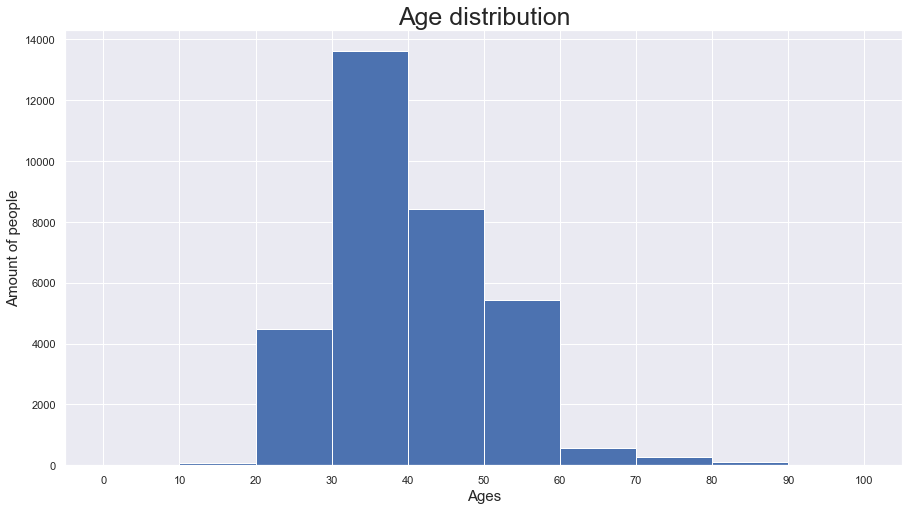

In [101]:
ages = data['age']
range = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(15,8))
sns.set()
plt.hist(ages, bins=range)
plt.title(label="Age distribution", fontsize=25)
plt.xticks(range)
plt.xlabel('Ages', fontsize=15)
plt.ylabel('Amount of people', fontsize=15)
plt.show()

## Job

Categorica nominal 
(cuantas categorias hay?, una col por categoria + top k)

In [102]:
count = data['job'].value_counts()
print(count)
categories = data['job'].unique()
print("amount: ", len(categories))

admin.           8371
blue-collar      7383
technician       5418
services         3173
management       2328
retired          1358
entrepreneur     1156
self-employed    1148
housemaid         858
unemployed        813
student           698
unknown           246
Name: job, dtype: int64
amount:  12


Hay 246 datos faltantes. Creo que en este caso no tiene sentido imputarlos por valores parecidos (Hot deck), porque no hay datos de cuanto ganan ni nada que sea especifico de los trabajos.
Podemos imputarlo aleatoriamente.

Otra cosa: como podemos capaz juntarlos en categorías para disminuir en cols. Ej:
- entrepreneur + self-employed 
- admin. + management
- blue-collar
- technician + services
- retired + unemployed + student   
- housemaid 

#### Missing data imputation

#### One hot encoding

In [103]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['job'], prefix='job', drop_first = False)], axis=1)
clean_data.drop(columns='job')
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,1,0,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,0,0,0,1,0,0,0,0,0,0
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,0
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,0


## Marital

This data is a categorical and nominal kind of data, there are 3 possible values: 'single', 'married' and 'divorced'.<br>
We assigned 1-single 2-married 3-divorced

In [104]:
clean_data['marital'] = clean_data['marital'].replace('single',1)
clean_data['marital'] = clean_data['marital'].replace('married',2)
clean_data['marital'] = clean_data['marital'].replace('divorced',3)
data.loc[data['marital']=='unknown'] #faltantes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
97,33,technician,unknown,professional.course,unknown,yes,no,telephone,may,fri,378,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
176,31,admin.,unknown,high.school,no,no,no,telephone,may,mon,182,8,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
2968,25,technician,unknown,university.degree,no,yes,yes,cellular,may,mon,150,1,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,no
4782,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,617,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
5308,37,unemployed,unknown,university.degree,no,no,no,cellular,jun,tue,100,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
5425,45,unknown,unknown,unknown,no,yes,no,cellular,jul,wed,586,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes
5455,50,unemployed,unknown,basic.9y,no,no,no,telephone,nov,thu,278,6,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no
5717,66,retired,unknown,basic.9y,no,yes,no,cellular,aug,wed,340,2,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,no
5774,35,services,unknown,high.school,no,no,no,cellular,may,tue,516,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
6478,34,admin.,unknown,university.degree,no,yes,no,cellular,may,mon,447,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


## Education
This data is caterogircal an ordinal kin d of data. There are 7 possible values: 'university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate' and 'unknown'.  <br>
The feature engineering approach is to generate an ordinal encoding scheme for mapping each category to a numeric value by leveraging scikit-learn.<br>

#### Outliers

In [105]:
edu_count = data['education'].value_counts()
edu_count

university.degree      9774
high.school            7637
basic.9y               4828
professional.course    4207
basic.4y               3325
basic.6y               1820
unknown                1347
illiterate               12
Name: education, dtype: int64

#### Feature Engineering

In [106]:
edu_dict = { 'university.degree' : 7,
             'professional.course' : 6,
             'high.school' : 5,
             'basic.9y': 4,
             'basic.6y' : 3, 
             'basic.4y' : 2,
             'illiterate' : 1,
             'unknown' : 0}
data['edu_ordinal_label'] = data.education.map(edu_dict)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,edu_ordinal_label
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,7
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,2
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,7
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,31,technician,single,professional.course,no,yes,no,cellular,aug,fri,122,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,6
32946,78,retired,divorced,professional.course,no,yes,no,cellular,mar,tue,591,1,999,1,failure,-1.8,93.369,-34.8,0.655,5008.7,yes,6
32947,32,services,married,high.school,no,yes,no,cellular,aug,thu,105,1,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no,5
32948,36,technician,single,university.degree,no,yes,no,cellular,jun,mon,287,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,yes,7


# Default

In [107]:
cant = data['default'].value_counts()
cant

no         26074
unknown     6875
yes            1
Name: default, dtype: int64

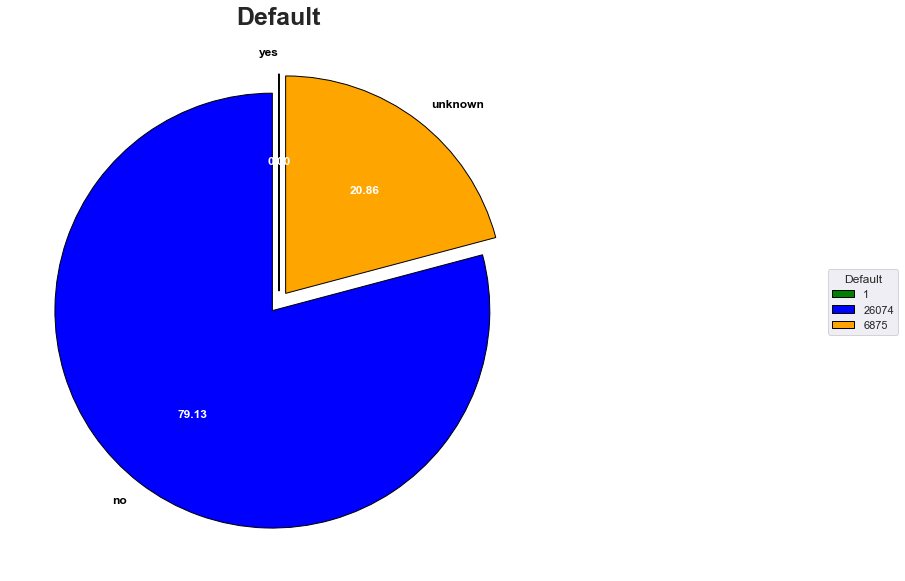

In [108]:
default = [cant['yes'], cant['no'], cant['unknown']]
c = ( "green", "blue", "orange") 
props = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, autotexts, texts = ax.pie(default, explode = explode, labels = ['yes', 'no', 'unknown'], colors = c, startangle = 90,wedgeprops = props, autopct='%.2f', textprops = dict(color ="white", weight='bold', size = 12))
  
ax.legend(wedges, default, title ="Default", loc ="center left", bbox_to_anchor =(1.5, 0, 1.5, 1)) 
  
plt.setp(autotexts, color='black') 
ax.set_title("Default", fontsize=25, weight='bold') 
  
plt.show() 

In [109]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
labels = gle.fit_transform(data['default'])
mappings = {index: label for index, label in enumerate(gle.classes_)}

In [110]:
data['default_labels'] = labels
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,edu_ordinal_label,default_labels
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,7,0
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2,1
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,2,0
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,7,0
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,5,0
5,46,services,married,high.school,unknown,no,yes,cellular,jul,mon,336,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,5,1
6,27,services,married,high.school,no,yes,no,cellular,jul,fri,110,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,5,0
7,47,admin.,divorced,high.school,no,yes,no,telephone,jun,thu,1224,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,5,0
8,25,self-employed,single,university.degree,no,yes,no,cellular,jun,fri,382,5,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,7,0
9,27,blue-collar,single,basic.9y,no,no,no,cellular,jul,mon,808,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,4,0


In [111]:
data.corr(method ='pearson') 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,edu_ordinal_label,default_labels
age,1.000000,0.002847,0.002819,-0.035856,0.026519,0.000112,0.002811,0.127296,0.010991,-0.017799,-0.181328,0.164402
duration,0.002847,1.000000,-0.069869,-0.048326,0.025536,-0.034460,0.000501,-0.009431,-0.038950,-0.051114,-0.017785,-0.010540
campaign,0.002819,-0.069869,1.000000,0.051082,-0.078954,0.152342,0.130869,-0.014587,0.136691,0.145251,0.002657,0.034520
pdays,-0.035856,-0.048326,0.051082,1.000000,-0.590188,0.274937,0.083261,-0.095368,0.299377,0.374621,-0.027254,0.081258
previous,0.026519,0.025536,-0.078954,-0.590188,1.000000,-0.421930,-0.204187,-0.050395,-0.456738,-0.502996,0.017269,-0.100619
emp.var.rate,0.000112,-0.034460,0.152342,0.274937,-0.421930,1.000000,0.774406,0.198292,0.972267,0.906427,-0.035388,0.199734
cons.price.idx,0.002811,0.000501,0.130869,0.083261,-0.204187,0.774406,1.000000,0.060056,0.686713,0.519438,-0.095046,0.166511
cons.conf.idx,0.127296,-0.009431,-0.014587,-0.095368,-0.050395,0.198292,0.060056,1.000000,0.280013,0.102781,0.044676,0.025959
euribor3m,0.010991,-0.038950,0.136691,0.299377,-0.456738,0.972267,0.686713,0.280013,1.000000,0.944882,-0.026213,0.192075
nr.employed,-0.017799,-0.051114,0.145251,0.374621,-0.502996,0.906427,0.519438,0.102781,0.944882,1.000000,-0.018078,0.186816


## Housing

This data is a categorical and nominal kind of data, there are 3 possible values: 'yes', 'no' and 'unknown'. <br>
The feature engineering approach is to generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn.<br>
Reference: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

#### Outliers

In [112]:
count = data['housing'].value_counts()
count

yes        17292
no         14869
unknown      789
Name: housing, dtype: int64

There are only 3 possible values and the distribution between them is withing normal ranges, we don't have outliers. However, we need to imputate the unknown values.

#### Housing debt distribution

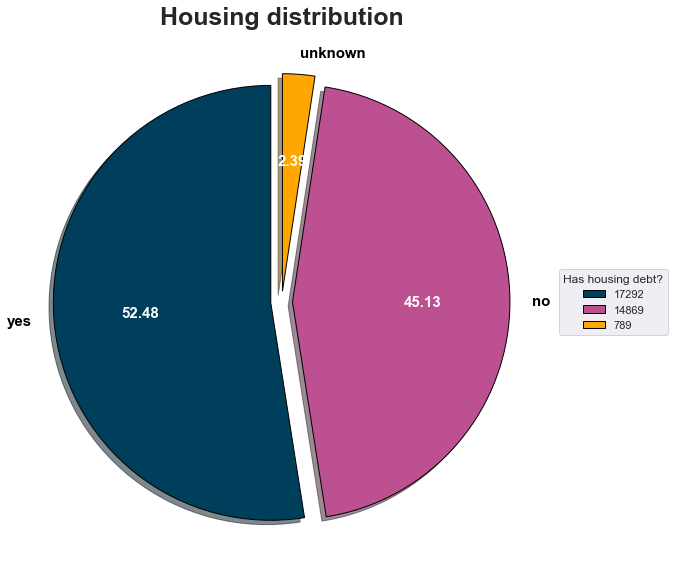

In [113]:
housing = [count['yes'], count['no'], count['unknown']]
explode = (0.05, 0.05, 0.05) 
colors = ( "#003f5c", "#bc5090", "#ffa600") 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, autotexts, texts = ax.pie(housing, explode = explode, labels = ['yes', 'no', 'unknown'], 
                           shadow = True, colors = colors, startangle = 90,
                           wedgeprops = wp, autopct='%.2f', 
                           textprops = dict(color ="white", weight='bold', size = 15))
  
ax.legend(wedges, housing, 
          title ="Has housing debt?", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 1.5, 1)) 
  
plt.setp(autotexts, color='black') 
ax.set_title("Housing distribution", fontsize=25, weight='bold') 
  
# show plot 
plt.show() 

#### Feature engineering

In [114]:
from sklearn.preprocessing import LabelEncoder


gle = LabelEncoder()
labels = gle.fit_transform(data['default'])
mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
mappings

{0: 'no', 1: 'unknown', 2: 'yes'}

In [115]:
clean_data['housing'] = labels
clean_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,31,admin.,1,university.degree,no,0,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,1,0,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,1,basic.4y,unknown,1,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0
2,70,retired,2,basic.4y,no,0,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,0,0,0,1,0,0,0,0,0,0
3,37,admin.,1,university.degree,no,0,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,0
4,48,admin.,2,high.school,no,0,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,0
5,46,services,2,high.school,unknown,1,yes,cellular,jul,mon,336,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0,0,0,0,0,0,0,1,0,0,0,0
6,27,services,2,high.school,no,0,no,cellular,jul,fri,110,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,0,0,0,0,0,0,0,1,0,0,0,0
7,47,admin.,3,high.school,no,0,no,telephone,jun,thu,1224,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,1,0,0,0,0,0,0,0,0,0,0,0
8,25,self-employed,1,university.degree,no,0,no,cellular,jun,fri,382,5,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,0,0,0,0,0,0,1,0,0,0,0,0
9,27,blue-collar,1,basic.9y,no,0,no,cellular,jul,mon,808,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0,1,0,0,0,0,0,0,0,0,0,0


#### Correlation evaluation

# FALTA CONTRA LOS VALORES QUE NO SON NUMERICOS

In [116]:
clean_data.corr(method ='pearson') 

,age,housing,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,1.000000,0.164402,0.002847,0.002819,-0.035856,0.026519,0.000112,0.002811,0.127296,0.010991,-0.017799,-0.100166,-0.027631,0.031608,0.088228,0.062643,0.438161,-0.000468,-0.062526,-0.199291,-0.065033,-0.007111,0.052800
housing,0.164402,1.000000,-0.010540,0.034520,0.081258,-0.100619,0.199734,0.166511,0.025959,0.192075,0.186816,-0.122826,0.174969,-0.001732,0.038881,-0.036096,0.009605,-0.005537,0.018164,-0.029909,-0.066433,0.013149,0.052613
duration,0.002847,-0.010540,1.000000,-0.069869,-0.048326,0.025536,-0.034460,0.000501,-0.009431,-0.038950,-0.051114,-0.011682,0.015243,0.006475,-0.006072,-0.001728,0.012718,0.001694,0.003325,0.016363,-0.017075,-0.003837,-0.003524
campaign,0.002819,0.034520,-0.069869,1.000000,0.051082,-0.078954,0.152342,0.130869,-0.014587,0.136691,0.145251,0.010909,-0.001535,0.000323,0.008125,-0.005582,-0.011074,0.007252,-0.001961,-0.023073,0.001502,0.002279,-0.001971
pdays,-0.035856,0.081258,-0.048326,0.051082,1.000000,-0.590188,0.274937,0.083261,-0.095368,0.299377,0.374621,-0.030276,0.066092,0.017471,0.002958,-0.002089,-0.070530,0.011996,0.034288,-0.086774,0.003822,-0.023500,-0.012765
previous,0.026519,-0.100619,0.025536,-0.078954,-0.590188,1.000000,-0.421930,-0.204187,-0.050395,-0.456738,-0.502996,0.023942,-0.053510,-0.012938,-0.013865,0.005016,0.062478,-0.013184,-0.014023,0.098436,-0.015512,0.007305,-0.002681
emp.var.rate,0.000112,0.199734,-0.034460,0.152342,0.274937,-0.421930,1.000000,0.774406,0.198292,0.972267,0.906427,-0.024250,0.054454,0.009532,0.036427,-0.015780,-0.103998,0.000491,0.022345,-0.136524,0.052830,-0.015905,0.010163
cons.price.idx,0.002811,0.166511,0.000501,0.130869,0.083261,-0.204187,0.774406,1.000000,0.060056,0.686713,0.519438,-0.040613,0.073389,0.011754,0.029402,-0.024646,-0.051325,-0.005952,0.034781,-0.062623,-0.013046,-0.000310,0.017245
cons.conf.idx,0.127296,0.025959,-0.009431,-0.014587,-0.095368,-0.050395,0.198292,0.060056,1.000000,0.280013,0.102781,0.034212,-0.107461,-0.032790,0.032963,0.004529,0.084479,0.002284,-0.050861,0.009306,0.054211,0.016880,0.038058
euribor3m,0.010991,0.192075,-0.038950,0.136691,0.299377,-0.456738,0.972267,0.686713,0.280013,1.000000,0.944882,-0.023970,0.043470,0.018191,0.035970,-0.000642,-0.102804,0.006155,0.018357,-0.143846,0.049991,-0.009979,0.011872


The Pearson correlation index indicates that there is no correlation between Housing and the other columns

## Loan

binaria, faltantes (?) - evaluar correlacion con otras columnas (trabajo, edad) 

In [117]:
count = data['loan'].value_counts()
print(count)

no         27196
yes         4965
unknown      789
Name: loan, dtype: int64


#### Missing data imputation

### Encoding

In [118]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['loan'], prefix='loan', drop_first = True)], axis=1).drop(columns=['loan_unknown'])
clean_data.drop(columns='loan')
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes
0,31,admin.,1,university.degree,no,0,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,1,basic.4y,unknown,1,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0
2,70,retired,2,basic.4y,no,0,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,0,0,0,1,0,0,0,0,0,0,0
3,37,admin.,1,university.degree,no,0,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0
4,48,admin.,2,high.school,no,0,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,0,0


## Contact

Transform to binary 0-cellular 1-telephone

In [119]:
clean_data['contact'] = clean_data['contact'].replace('cellular',0)
clean_data['contact'] = clean_data['contact'].replace('telephone',1)
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes
0,31,admin.,1,university.degree,no,0,no,0,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,1,basic.4y,unknown,1,unknown,1,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0
2,70,retired,2,basic.4y,no,0,no,0,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,0,0,0,1,0,0,0,0,0,0,0
3,37,admin.,1,university.degree,no,0,no,0,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0
4,48,admin.,2,high.school,no,0,no,1,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Encoding

In [120]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['loan'], prefix='loan', drop_first = True)], axis=1)
clean_data.drop(columns='loan')
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes,loan_unknown,loan_yes
0,31,admin.,1,university.degree,no,0,no,0,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,1,basic.4y,unknown,1,unknown,1,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,70,retired,2,basic.4y,no,0,no,0,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,37,admin.,1,university.degree,no,0,no,0,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48,admin.,2,high.school,no,0,no,1,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Month

#### Outliers

In [121]:
month_count = data['month'].value_counts()
month_count

may    11003
jul     5766
aug     4905
jun     4276
nov     3293
apr     2118
oct      551
sep      468
mar      424
dec      146
Name: month, dtype: int64

#### Feature Engineering

In [122]:
month_dict = { 'jan' : 1,
               'feb' : 2,
               'mar' : 3,
               'apr': 4,
               'may' : 5, 
               'jun' : 6,
               'jul' : 7,
               'aug' : 8,
               'sep' : 9,
               'oct' : 10,
               'nov' : 11,
               'dec' : 12}
data['month_ordinal_label'] = data.month.map(month_dict)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,edu_ordinal_label,default_labels,month_ordinal_label
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,7,0,7
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2,1,5
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,2,0,10
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,7,0,5
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,5,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,31,technician,single,professional.course,no,yes,no,cellular,aug,fri,122,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,6,0,8
32946,78,retired,divorced,professional.course,no,yes,no,cellular,mar,tue,591,1,999,1,failure,-1.8,93.369,-34.8,0.655,5008.7,yes,6,0,3
32947,32,services,married,high.school,no,yes,no,cellular,aug,thu,105,1,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no,5,0,8
32948,36,technician,single,university.degree,no,yes,no,cellular,jun,mon,287,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,yes,7,0,6


# day_of_week

In [123]:
(data.day_of_week.unique())

array(['tue', 'wed', 'mon', 'fri', 'thu'], dtype=object)

In [124]:
def convertir(day_of_week):
    if day_of_week == 'mon':
        return 0
    elif day_of_week == 'tue':
        return 1
    elif day_of_week == 'wed':
        return 2
    elif day_of_week == 'thu':
        return 3
    elif day_of_week == 'fri':
        return 4
data["day_of_week"] = data["day_of_week"].apply(convertir)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,edu_ordinal_label,default_labels,month_ordinal_label
0,31,admin.,single,university.degree,no,no,no,cellular,jul,1,555,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,7,0,7
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,2,64,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2,1,5
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,0,131,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,2,0,10
3,37,admin.,single,university.degree,no,no,no,cellular,may,2,51,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,7,0,5
4,48,admin.,married,high.school,no,no,no,telephone,nov,1,301,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,5,0,11
5,46,services,married,high.school,unknown,no,yes,cellular,jul,0,336,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,5,1,7
6,27,services,married,high.school,no,yes,no,cellular,jul,4,110,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,5,0,7
7,47,admin.,divorced,high.school,no,yes,no,telephone,jun,3,1224,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,5,0,6
8,25,self-employed,single,university.degree,no,yes,no,cellular,jun,4,382,5,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,7,0,6
9,27,blue-collar,single,basic.9y,no,no,no,cellular,jul,0,808,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,4,0,7


## Duration

This indicates the duration of the last call, in seconds. It is a numerical tyoe of data, with wide ranges.

#### Distribution

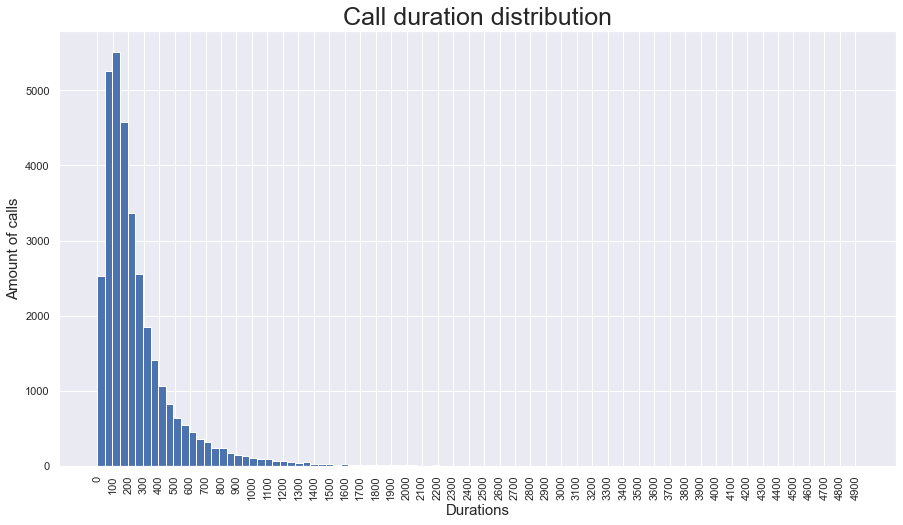

In [125]:
durations = data['duration']
range = np.arange(0, 5000, 100)
plt.figure(figsize=(15,8))
sns.set()
plt.hist(durations, bins=100)
plt.title(label="Call duration distribution", fontsize=25)
plt.xticks(range, rotation=90)
plt.xlabel('Durations', fontsize=15)
plt.ylabel('Amount of calls', fontsize=15)
plt.show()

It seems that we have outliers for the calls that last more than 1600 seconds.

#### Outliers analysis

In [126]:
data['duration'].describe()

count    32950.000000
mean       257.240728
std        257.171015
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

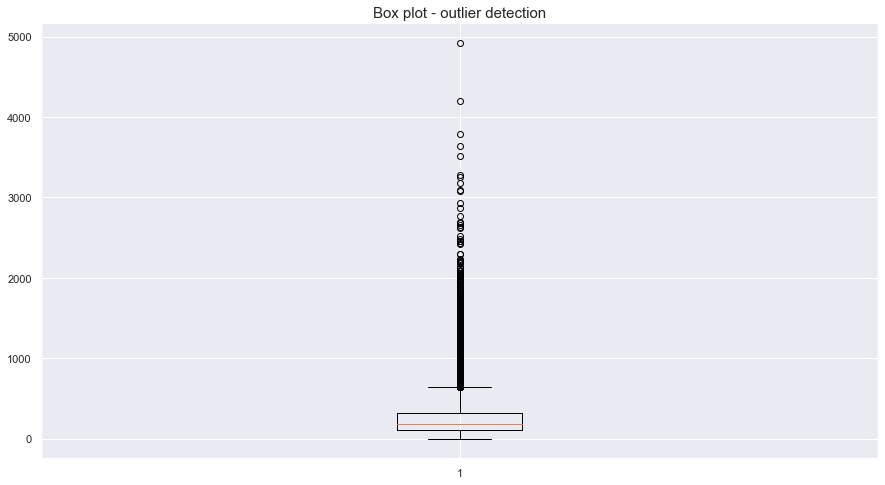

In [127]:
plt.figure(figsize=(15,8))
plt.title('Box plot - outlier detection', fontsize=15)
plt.boxplot(data['duration'])
plt.show()

Using the describe function and the box plot is clear that the higher numbers are likely to be outliers. The Pearson correlation doesn't indicate a relation between the call duration and the other measured values, we can assume that this outliers won't bias out data because they seem to be caused completely at random.

#### Feature engineering

The selected approach will be to do data binning for two main reasons:
- Using the individual call durations has no utility for the analysis
- We can treat the outliers and fit them into the top or lower bins
<br>
<br>
We will use equal width binning, it tries to divide up the underlying data into equal sized bins.
The qcut function from pandas will be used, it defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.<br>
Reference: https://pbpython.com/pandas-qcut-cut.html, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [128]:
bins = pd.qcut(data['duration'], q=10)
bins.value_counts()

(88.0, 117.0]      3390
(-0.001, 59.0]     3366
(146.0, 180.0]     3358
(279.0, 367.0]     3304
(546.0, 4918.0]    3292
(367.0, 546.0]     3286
(221.0, 279.0]     3282
(180.0, 221.0]     3236
(59.0, 88.0]       3226
(117.0, 146.0]     3210
Name: duration, dtype: int64

### BINS

In [129]:
bins.unique()

[(546.0, 4918.0], (59.0, 88.0], (117.0, 146.0], (-0.001, 59.0], (279.0, 367.0], (88.0, 117.0], (367.0, 546.0], (221.0, 279.0], (146.0, 180.0], (180.0, 221.0]]
Categories (10, interval[float64]): [(-0.001, 59.0] < (59.0, 88.0] < (88.0, 117.0] < (117.0, 146.0] ... (221.0, 279.0] < (279.0, 367.0] < (367.0, 546.0] < (546.0, 4918.0]]

In [130]:
clean_data['duration'] = pd.qcut(data['duration'], q=10, labels=False)
clean_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes,loan_unknown,loan_yes
0,31,admin.,1,university.degree,no,0,no,0,jul,tue,9,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,1,basic.4y,unknown,1,unknown,1,may,wed,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,70,retired,2,basic.4y,no,0,no,0,oct,mon,3,1,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,37,admin.,1,university.degree,no,0,no,0,may,wed,0,4,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48,admin.,2,high.school,no,0,no,1,nov,tue,7,1,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,46,services,2,high.school,unknown,1,yes,0,jul,mon,7,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
6,27,services,2,high.school,no,0,no,0,jul,fri,2,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,47,admin.,3,high.school,no,0,no,1,jun,thu,9,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,25,self-employed,1,university.degree,no,0,no,0,jun,fri,8,5,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,27,blue-collar,1,basic.9y,no,0,no,0,jul,mon,9,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Campaign

In [131]:
número de contactos realizados durante esta campaña y para este cliente -> solo evaluar si hay outliers

SyntaxError: invalid syntax (<ipython-input-131-14a71122b317>, line 1)

In [ ]:
data['campaign'].describe()

In [ ]:
amount_campaign = data['campaign']
range = np.arange(1, 60, 1)
plt.figure(figsize=(15,8))
sns.set()
plt.hist(amount_campaign, bins=60)
plt.title(label="Amount of contacts during campaign distribution", fontsize=25)
plt.xticks(range, rotation=90)
plt.xlabel('Amount of contacts', fontsize=15)
plt.ylabel('Clients', fontsize=15)
plt.show()

Due to this distribution we are going to use a top-coding to normalize the data. 

#### Encoding

In [ ]:
top_code = data['campaign'].quantile(0.75)

In [ ]:
def campaign_top_coding(value):
    if(value > top_code + 1):
        return top_code + 1
    else:
        return value

In [ ]:
clean_data['campaign'] = data['campaign'].apply(campaign_top_coding)
clean_data['campaign'].value_counts()

## Pdays

Número de días que pasaron desde la última vez que se contactó con el cliente desde una campaña anterior.
Los dividimos en dos categorías 0-Se contactó al cliente recientemente(0-27 días) 1-No se ha contactado al cliente desde la campaña anterior (999 días)

In [ ]:
clean_data['pdays'] = clean_data['pdays'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],0)
clean_data['pdays'] = clean_data['pdays'].replace(999,1)

## Previous

#### Outliers

In [ ]:
previous_count = data['previous'].value_counts()
previous_count

#### Feature Engineering

In [ ]:
top_code = data['previous'].quantile(0.9)
top_code

In [ ]:
def previous_top_coding(value):
    if(value > top_code + 1):
        return top_code + 1
    else:
        return value

In [ ]:
clean_data['previous'] = data['previous'].apply(previous_top_coding)
clean_data['previous'].value_counts()